<a href="https://colab.research.google.com/github/rithikalite/Pest-presiction-system-pro-model/blob/main/pest_prediction_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy scikit-learn matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
np.random.seed(42)
n_samples = 500

data = pd.DataFrame({
    'temperature': np.random.uniform(20, 40, n_samples),
    'humidity': np.random.uniform(30, 90, n_samples),
    'rainfall': np.random.uniform(0, 200, n_samples),
    'soil_moisture': np.random.uniform(10, 80, n_samples),
    'crop_type': np.random.choice(['Rice', 'Wheat', 'Cotton', 'Maize'], n_samples)
})
data = pd.get_dummies(data, columns=['crop_type'], drop_first=False)

# Generate pest risk label using synthetic environmental logic
data['pest_risk'] = np.where(
    (data['humidity'] > 70) & (data['temperature'] > 30) & (data['soil_moisture'] > 50),
    'High',
    np.where((data['humidity'] > 50) & (data['temperature'] > 25), 'Medium', 'Low'))

In [ ]:
X = data.drop('pest_risk', axis=1)
y = data['pest_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("✅ Model trained successfully!")
print("Model Accuracy:", round(accuracy_score(y_test, model.predict(X_test)), 2))
print("\nClassification Report:\n", classification_report(y_test, model.predict(X_test)))

✅ Model trained successfully!
Model Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00         2
         Low       1.00      1.00      1.00        49
      Medium       1.00      1.00      1.00        49

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



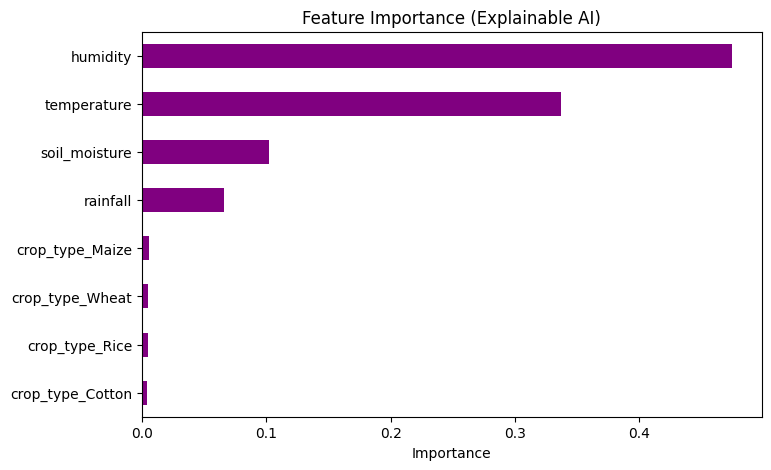

In [ ]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(8,5), color='purple')
plt.title('Feature Importance (Explainable AI)')
plt.xlabel('Importance')
plt.show()

In [ ]:
def give_recommendation(temp, hum, rain, moist, crop):
    """Predict pest risk and provide recommendations."""
    crops = ['Cotton', 'Maize', 'Rice', 'Wheat']

    # Create input DataFrame
    input_data = pd.DataFrame({
        'temperature': [temp],
        'humidity': [hum],
        'rainfall': [rain],
        'soil_moisture': [moist],
        **{f'crop_type_{c}': [1 if c == crop else 0] for c in crops}
    })
    pred = model.predict(input_data)[0]

    print("\n🌾 --- Pest Attack Prediction Result --- 🌾")
    print(f"Temperature: {temp}°C")
    print(f"Humidity: {hum}%")
    print(f"Rainfall: {rain} mm")
    print(f"Soil Moisture: {moist}%")
    print(f"Crop Type: {crop}")
    print(f"Predicted Pest Risk Level: {pred}")

    # Recommendation system
    if pred == 'High':
        print("🪳 Recommendation: Apply biological pesticides, monitor daily, use pheromone traps.")
    elif pred == 'Medium':
        print("🌿 Recommendation: Increase soil aeration and reduce irrigation frequency.")
    else:
        print("🌾 Recommendation: Maintain current conditions, no immediate action needed.")


In [ ]:
print("\n📥 Enter the current field/environment details:")

try:
    temp = float(input("Enter Temperature (°C): "))
    hum = float(input("Enter Humidity (%): "))
    rain = float(input("Enter Rainfall (mm): "))
    moist = float(input("Enter Soil Moisture (%): "))

    print("\nSelect Crop Type:")
    print("1. Rice\n2. Wheat\n3. Cotton\n4. Maize")
    crop_choice = int(input("Enter choice (1-4): "))

    crop_map = {1: 'Rice', 2: 'Wheat', 3: 'Cotton', 4: 'Maize'}
    crop = crop_map.get(crop_choice, 'Rice')

    # Predict pest risk
    give_recommendation(temp, hum, rain, moist, crop)

except ValueError:
    print("⚠️ Invalid input! Please enter numeric values for temperature, humidity, rainfall, and moisture.")


📥 Enter the current field/environment details:
Enter Temperature (°C): 33
Enter Humidity (%): 80
Enter Rainfall (mm): 120
Enter Soil Moisture (%): 65

Select Crop Type:
1. Rice
2. Wheat
3. Cotton
4. Maize
Enter choice (1-4): 1

🌾 --- Pest Attack Prediction Result --- 🌾
Temperature: 33.0°C
Humidity: 80.0%
Rainfall: 120.0 mm
Soil Moisture: 65.0%
Crop Type: Rice
Predicted Pest Risk Level: High
🪳 Recommendation: Apply biological pesticides, monitor daily, use pheromone traps.
